<a href="https://colab.research.google.com/github/RodrighoNS/ml-notebooks/blob/master/Titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Kaggle Challenge**<br>
The data has been split into two groups:

training set (train.csv) <br>
test set (test.csv) <br>

The **training set** should be used to build your machine learning models. For the 
training set, we provide the outcome (also known as the “ground truth”) for each 
passenger. Your model will be based on “features” like passengers’ gender and 
class. You can also use feature engineering to create new features.

The **test set** should be used to see how well your model performs on unseen data. 
For the test set, we do not provide the ground truth for each passenger. It is 
your job to predict these outcomes. For each passenger in the test set, use the 
model you trained to predict whether or not they survived the sinking of the 
Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and 
only female passengers survive, as an example of what a submission file should 
look like.

**Data Dictionary**

survival =	Survival	0 = No, 1 = Yes <br>
pclass =	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex	= Sex - gender <br>
Age	= Age in years	<br>
sibsp	= # of siblings / spouses aboard the Titanic	<br>
parch	= # of parents / children aboard the Titanic	<br>
ticket = Ticket number	<br>
fare = Passenger fare	<br>
cabin	= Cabin number	<br>
embarked = Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [1]:
# Mount Google Drive as a data host.
from google.colab import drive

#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
# Import data from Google Drive host folder
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic-data/train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import numpy as np 
# número de sobrevivientes y no sobrevivientes diferente (data desbalanceada)
print(data.to_numpy().shape[0])
print(np.sum(data.to_numpy()[:,1]))

891
342


In [6]:
# Visualicemos la data >:D
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sex')

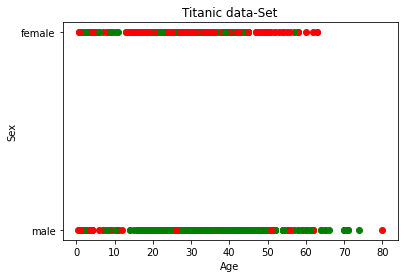

In [7]:
# create color dictionary
colors = {1:'r', 0:'g'}  # en rojo sobrevive, en verde muere D:
# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(data['Age'])):
    ax.scatter(data['Age'][i], data['Sex'][i],color=colors[data['Survived'][i]])
# set a title and labels
ax.set_title('Titanic data-Set')
ax.set_xlabel('Age')
ax.set_ylabel('Sex')

In [8]:
# Primera conclusión: Murieron muchos hombres. La wea depende mucho del Sexo.

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Limpieza de data

# Reemplazando valores NaN
# 'Sex'
data['Sex'].fillna('no gender', inplace=True)
# 'Cabin'
data['Cabin'].fillna('no cabin', inplace=True)
# 'Age'
#data['Age'].fillna('no age', inplace=True)

#
# Transformando variables categoricas en numericas
#
# 'Sex'
data['gender_M'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data['gender_F'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)
data['gender_noGender'] = data['Sex'].apply(lambda x: 1 if x == 'no gender' else 0)
# 'Embarked'
# embarked = Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
data['embarked_C'] = data['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
data['embarked_Q'] = data['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
data['embarked_S'] = data['Embarked'].apply(lambda x: 1 if x == 'S' else 0)

# No-useful-column drops
# 'Sex'
df = data.drop(['Sex','Embarked'], axis=1)

# Clean DataFrame
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,gender_M,gender_F,gender_noGender,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,no cabin,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,no cabin,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,no cabin,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,no cabin,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,no cabin,0,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,1,0,0


In [11]:
print(df.groupby('Age').size())

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64
